## Preliminary data exploration on source data

In [3]:
import pandas as pd
df = pd.read_csv("source_data/winemag-data-130k-v2.csv")

In [7]:
df.head()

,Unnamed: 0,country,description,designation,points,price,province,region_1,region_2,taster_name,taster_twitter_handle,title,variety,winery
0,0,Italy,"Aromas include tropical fruit, broom, brimston...",Vulkà Bianco,87,NaN,Sicily & Sardinia,Etna,NaN,Kerin O’Keefe,@kerinokeefe,Nicosia 2013 Vulkà Bianco (Etna),White Blend,Nicosia
1,1,Portugal,"This is ripe and fruity, a wine that is smooth...",Avidagos,87,15.0,Douro,NaN,NaN,Roger Voss,@vossroger,Quinta dos Avidagos 2011 Avidagos Red (Douro),Portuguese Red,Quinta dos Avidagos
2,2,US,"Tart and snappy, the flavors of lime flesh and...",NaN,87,14.0,Oregon,Willamette Valley,Willamette Valley,Paul Gregutt,@paulgwine,Rainstorm 2013 Pinot Gris (Willamette Valley),Pinot Gris,Rainstorm
3,3,US,"Pineapple rind, lemon pith and orange blossom ...",Reserve Late Harvest,87,13.0,Michigan,Lake Michigan Shore,NaN,Alexander Peartree,NaN,St. Julian 2013 Reserve Late Harvest Riesling ...,Riesling,St. Julian
4,4,US,"Much like the regular bottling from 2012, this...",Vintner's Reserve Wild Child Block,87,65.0,Oregon,Willamette Valley,Willamette Valley,Paul Gregutt,@paulgwine,Sweet Cheeks 2012 Vintner's Reserve Wild Child...,Pinot Noir,Sweet Cheeks


#### Check which columns have null values

In [11]:
for col in df.columns[1:]:
    print("Column",col,"has",df[col].isnull().sum(),"empty values.")

Column country has 63 empty values.
Column description has 0 empty values.
Column designation has 37465 empty values.
Column points has 0 empty values.
Column price has 8996 empty values.
Column province has 63 empty values.
Column region_1 has 21247 empty values.
Column region_2 has 79460 empty values.
Column taster_name has 26244 empty values.
Column taster_twitter_handle has 31213 empty values.
Column title has 0 empty values.
Column variety has 1 empty values.
Column winery has 0 empty values.


**Conclusions**: 
- Columns with no empty values: description, points, title, winery.
- the vast majority of rows have country and province information
- All but one has variety information
- the rest of the data have significant missing data, including designation, price, province, region, taster info

#### Deeper dive into "country" and "province"

In [17]:
countries = df["country"].unique()
print(countries)
print(len(countries)-1)

['Italy' 'Portugal' 'US' 'Spain' 'France' 'Germany' 'Argentina' 'Chile'
 'Australia' 'Austria' 'South Africa' 'New Zealand' 'Israel' 'Hungary'
 'Greece' 'Romania' 'Mexico' 'Canada' nan 'Turkey' 'Czech Republic'
 'Slovenia' 'Luxembourg' 'Croatia' 'Georgia' 'Uruguay' 'England' 'Lebanon'
 'Serbia' 'Brazil' 'Moldova' 'Morocco' 'Peru' 'India' 'Bulgaria' 'Cyprus'
 'Armenia' 'Switzerland' 'Bosnia and Herzegovina' 'Ukraine' 'Slovakia'
 'Macedonia' 'China' 'Egypt']
43


In [30]:
provinces = df["province"].unique()
print(len(provinces)-1)

425


In [22]:
df[df['country'].isnull()].index == df[df['province'].isnull()].index

array([ True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True])

In [32]:
idx_missing_location = df[df['country'].isnull()].index
print(df.loc[idx_missing_location])

        Unnamed: 0 country                                        description  \
913            913     NaN  Amber in color, this wine has aromas of peach ...   
3131          3131     NaN  Soft, fruity and juicy, this is a pleasant, si...   
4243          4243     NaN  Violet-red in color, this semisweet wine has a...   
9509          9509     NaN  This mouthwatering blend starts with a nose of...   
9750          9750     NaN  This orange-style wine has a cloudy yellow-gol...   
...            ...     ...                                                ...   
124176      124176     NaN  This Swiss red blend is composed of four varie...   
129407      129407     NaN  Dry spicy aromas of dusty plum and tomato add ...   
129408      129408     NaN  El Capricho is one of Uruguay's more consisten...   
129590      129590     NaN  A blend of 60% Syrah, 30% Cabernet Sauvignon a...   
129900      129900     NaN  This wine offers a delightful bouquet of black...   

                           

Look more into the wineries of rows with missing information:

In [42]:
wineries_with_missing_location = df["winery"].loc[idx_missing_location]
print(wineries_with_missing_location.value_counts())
print(len(wineries_with_missing_location.unique()))

Neumeister                         9
Orbelus                            7
Psagot                             4
Stone Castle                       4
Gotsa Family Wines                 4
Ross-idi                           4
El Capricho                        3
Tsililis                           3
St. Donat                          3
Les Frères Dutruy                  2
Mt. Beautiful                      2
Barton & Guestier                  2
Ktima Voyatzi                      2
Newton Johnson                     1
Amiran Vepkhvadze                  1
Somlói Vándor                      1
Logodaj                            1
Lismore                            1
Santa Ema                          1
Kakhetia Traditional Winemaking    1
Chilcas                            1
Bachelder                          1
Undurraga                          1
Teliani Valley                     1
Bartho Eksteen                     1
Familia Deicas                     1
Büyülübağ                          1
N

Check if these wineries appeared anywhere else in the dataset

In [45]:
for winery in wineries_with_missing_location.unique():
    total = df['winery'].value_counts()[winery]
    missing = wineries_with_missing_location.value_counts()[winery]
    print(winery,"-- Total:",total,"Missing:",missing)

Gotsa Family Wines -- Total: 5 Missing: 4
Barton & Guestier -- Total: 80 Missing: 2
Kakhetia Traditional Winemaking -- Total: 1 Missing: 1
Tsililis -- Total: 3 Missing: 3
Ross-idi -- Total: 4 Missing: 4
Orbelus -- Total: 7 Missing: 7
St. Donat -- Total: 3 Missing: 3
Familia Deicas -- Total: 13 Missing: 1
Bartho Eksteen -- Total: 2 Missing: 1
Stone Castle -- Total: 4 Missing: 4
Teliani Valley -- Total: 7 Missing: 1
Undurraga -- Total: 113 Missing: 1
Mt. Beautiful -- Total: 7 Missing: 2
Neumeister -- Total: 38 Missing: 9
Bachelder -- Total: 2 Missing: 1
Chilcas -- Total: 54 Missing: 1
Santa Ema -- Total: 112 Missing: 1
Psagot -- Total: 19 Missing: 4
Newton Johnson -- Total: 2 Missing: 1
Ktima Voyatzi -- Total: 4 Missing: 2
Lismore -- Total: 1 Missing: 1
Logodaj -- Total: 2 Missing: 1
Somlói Vándor -- Total: 1 Missing: 1
Les Frères Dutruy -- Total: 2 Missing: 2
El Capricho -- Total: 3 Missing: 3
Amiran Vepkhvadze -- Total: 1 Missing: 1
Büyülübağ -- Total: 1 Missing: 1


In [46]:
print("Only wineries that have never had any location data:")
print("....................................................")
for winery in wineries_with_missing_location.unique():
    total = df['winery'].value_counts()[winery]
    missing = wineries_with_missing_location.value_counts()[winery]
    if total == missing:
        print(winery,"-- Total:",total,"Missing:",missing)

Only wineries that have never had any location data:
....................................................
Kakhetia Traditional Winemaking -- Total: 1 Missing: 1
Tsililis -- Total: 3 Missing: 3
Ross-idi -- Total: 4 Missing: 4
Orbelus -- Total: 7 Missing: 7
St. Donat -- Total: 3 Missing: 3
Stone Castle -- Total: 4 Missing: 4
Lismore -- Total: 1 Missing: 1
Somlói Vándor -- Total: 1 Missing: 1
Les Frères Dutruy -- Total: 2 Missing: 2
El Capricho -- Total: 3 Missing: 3
Amiran Vepkhvadze -- Total: 1 Missing: 1
Büyülübağ -- Total: 1 Missing: 1


Through Google, this seems to be the information about the following wineries:
- Kakhetia Traditional Winemaking: Tbilisi, Georgia
- Tsililis: Ράξα, Greece
- Ross-idi: Nikolaevo, Bulgaria
- Orbelus: Kromidovo village, Bulgaria
- St. Donat: Csopak, Hungary
- Stone Castle: Bernjaka P.N. Rahovec, Kosovo
- Lismore: Greyton, South Africa
- Somlói Vándor: Somlóvásárhely, Hungary
- Les Frères Dutruy: Founex, Switzerland
- El Capricho: Villa del Carmen, Uruguay
- Amiran Vepkhvadze: Kveda Kldeeti, Georgia
- Büyülübağ: Istanbul, Turkey

**Conclusions:**
- The original data has reviews of wines from 43 countries and 425 provinces. 
- All 63 rows missing "country" data are also missing "province" data. 
- These 63 rows include 27 unique wineries.
- Some of the wineries of reviews missing country data appear in other locations in the dataset, and therefore have location data elsewhere in the dataset.
- Only 12 of the 27 wineries appear nowhere else in the dataset: I found where those wineries are located manually on Google without much difficulty.

#### Check unique values and missing row for "variety"

In [47]:
df['variety'].value_counts()

Pinot Noir                    13272
Chardonnay                    11753
Cabernet Sauvignon             9472
Red Blend                      8946
Bordeaux-style Red Blend       6915
                              ...  
Cabernet Sauvignon-Barbera        1
Sauvignonasse                     1
Forcallà                          1
Meseguera                         1
Bobal-Cabernet Sauvignon          1
Name: variety, Length: 707, dtype: int64

In [61]:
missing_variety = df.loc[df[df['variety'].isnull()].index]
print(missing_variety)

       Unnamed: 0 country                                        description  \
86909       86909   Chile  A chalky, dusty mouthfeel nicely balances this...   

      designation  points  price      province region_1 region_2 taster_name  \
86909         NaN      88   17.0  Maipo Valley      NaN      NaN         NaN   

      taster_twitter_handle                        title variety  winery  
86909                   NaN  Carmen 1999  (Maipo Valley)     NaN  Carmen  


In [63]:
df.loc[86909].description

"A chalky, dusty mouthfeel nicely balances this Petite Syrah's bright, full blackberry and blueberry fruit. Wheat-flour and black-pepper notes add interest to the bouquet; the wine finishes with herb and an acorny nuttiness. A good first Chilean wine for those more comfortable with the Californian style. It's got tannins to lose, but it's very good."

**Conclusion:**
This seems to be a rating for a Petite Sirah.

#### Check unique values for "winery"

In [65]:
df['winery'].value_counts()

Wines & Winemakers    222
Testarossa            218
DFJ Vinhos            215
Williams Selyem       211
Louis Latour          199
                     ... 
Hypothesis              1
Camps d'Estels          1
Harbor Town             1
Château de Saurs        1
Penedo Borges           1
Name: winery, Length: 16757, dtype: int64

#### Check distribution of point values

<Axes: >

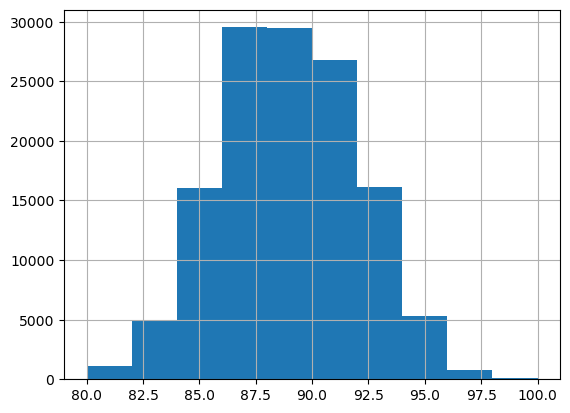

In [66]:
df["points"].hist()